Python for Bioinformatics, Practical Classes 2

<h3> Lambda+map/filter 

<h4> Exercise1: Let's define a list of sequences ["ATGGGG", "AAATT", "GGGATAGAGA", "GAGAT"] and in the next step create  a new list which elements are lengths for each sequence -> [6, 5, 10, 5].

In [1]:
sequences = ["ATGGGG", "AAATT", "GGGATAGAGA", "GAGAT"]

len_lambda = list(map(lambda a: len(a),sequences))  #apply lambda expression for every element in x
print(len_lambda)

[6, 5, 10, 5]


<h4> Exercise2: Let's define a list of sequences ["ATGGGG", "AAATT", "GGGATAGAGA", "GAGAT"] and in the next step create  a new list which contains only these sequences which starts with "G" -> ["GGGATAGAGA", "GAGAT"].

In [2]:
seq_g = [seq for seq in sequences if seq.startswith('G')]
seq_g

['GGGATAGAGA', 'GAGAT']

<h3> FASTA files processing

<h4> Example: Printing headings from a file containing sequences in FASTA format.

In [3]:
with open('sequences', 'r') as f:
    for line in f:  #for every line in sequences file
        line = line.rstrip() #The rstrip() method removes characters at the end a string (including "\n")
        if line.startswith('>'):
            print(line)
        

>s1
>s2
>s3


In [4]:
f = open("sequences", "r")
for line in f:
    print(line)

>s1

ATGCGCG

>s2

TATCGGCG

>s3

CCCCCCCCCC


<h4> Exercise3: Open a file 'sequneces' and save sequences into the dictionary variable Seq.

 <br>
 
Remark: You may start with creating two lists containing headings and sequences and in the next step convert them into a dictionary.

In [5]:
def seq_to_dict(file_name):
    headers=[]
    seqs=[]
    with open("sequences") as f:
        for line in f:
            line = line.strip('\n')
            if line.startswith('>'):
                line = line.replace('>','')
                headers.append(line)
            else:
                seqs.append(line)
    return dict(zip(headers, seqs))

In [6]:
seq_to_dict(sequences)


{'s1': 'ATGCGCG', 's2': 'TATCGGCG', 's3': 'CCCCCCCCCC'}

<h3> Searching the set of Sequences

In the next three exercises, we will be searching a text file containing sequences.

<h4> Exercise4: Consider the following nucleotide sequence:

In [7]:
query = "ATGCAACATATGCGACAAATGCTATTCTTATTATATTCGGATTC"
from alignment import SequenceAlign, dotMatrix
import matplotlib.pyplot as plt

In [8]:
def extract_seq(filename):
    seqs=[]
    with open(filename) as f:
        for line in f:
            line = line.strip('\n')
            if line.startswith('>')==False:
                seqs.append(line)
    return seqs
def aligment_query_file(filename,query):
    scores=[]
    seqs = extract_seq(filename)
    for elem in seqs:
        scores.append(SequenceAlign(query, elem, insert=1, extend=1)[0])
    seq_score= dict(zip(seqs, scores))
    max_values = sorted(seq_score, key=seq_score.get, reverse=True)[:3]
    plt.hist(scores)
    return max_values

The three best aligments for the query is  ['ATGCGACATATGCGACAAATGCTATTCTTATTATATCGGATTC', 'ATACAACATATGCGACAAATGCTATTCTTATTATATTCGATTC', 'ATGCAACATATGCGACAAATGCTTCTTATTCTATTCGGATTC']


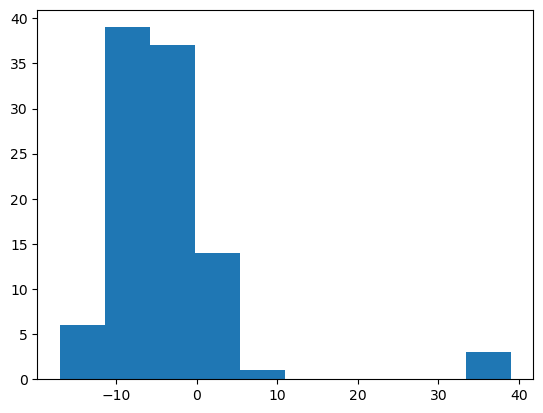

In [9]:
print(f'The three best aligments for the query is  {aligment_query_file("database_n",query)}')

<h4> File "database_n" contains 100 nucleotide sequences. 
<br>
    
Make an alignment between every subsequent sequence in the file and the query (assume the following system points: match:1, mismatch:-3, insert=1, extend=1). 
    
- Which sequences are the most similar to the query? You may plot the distributions of scores using plt.hist(data) method.

<h4> Exercise5: Consider the following protein sequence:

In [10]:
query = "EKPDPHTKMHQYWLKPYELMEIYYQYRPFINFDQQMRVGLRCEA"
from kmers import k_comparison, kmers

In [11]:
def kmers_query_file(filename,query):
    distances=[]
    proteins = extract_seq(filename)
    for elem in proteins:
        distances.append(k_comparison(query,elem))
    protein_score= dict(zip(proteins, distances))
    max_values = sorted(protein_score, key=protein_score.get, reverse=False)[:3]
    plt.hist(distances)
    return max_values

The three sequences that are the most similar to our query -  ['AKPDPHTKKHQYWLKPYELMEIYYQYRPFINFDQMRVGLRCEA', 'EKPHTKMHQYWLKPYELMEIYYQYRPFINDDQQMRVGLCEA', 'EKPDPHTKMHQYWLKPYELYRPFINFDQQMRVMLRCEA']


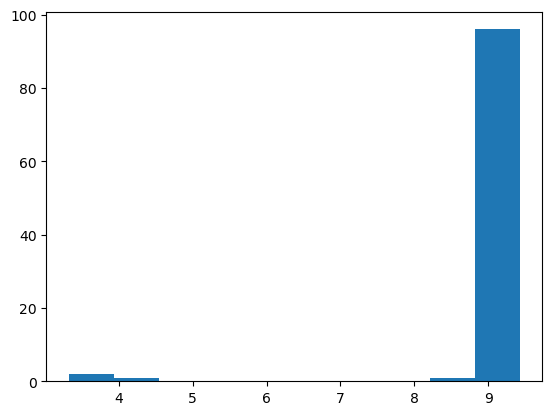

In [12]:
print(f'The three sequences that are the most similar to our query -  {kmers_query_file("database_p",query)}')


<h4> File "database_p" contains 100 protein sequences. 
<br>
    

    
Using k-mers with k=3, compare every sequence in the file and the query (you may use k_comparison method from the lecture2). 
    
- Which sequences are the most similar to the query? You may plot the distributions of distances using plt.hist(data) method. 

- What are the advantages and disadvatages of such an approach comparing to the alignment approach?  
    
- In the nucleotide case, the $k$ parameter should be bigger or smaller? Why?

<h4> Exercise6: Consider the following protein subsequence:

In [13]:
query = "WRQAAALQK"
from kmers import k_comparison, kmers

In [14]:
def kmers_check_query_file(filename,query):
    kmers_matches=[]
    query_kmers = kmers(query)
    proteins = extract_seq(filename)
    for elem in proteins: 
        seq_kmers = kmers(elem)
        matches = 0
        for key, value in query_kmers.items():
            if key in seq_kmers and seq_kmers[key] == value:
                matches += 1
        kmers_matches.append(matches)
    kmers_score= dict(zip(proteins, kmers_matches))
    max_values = sorted(kmers_score, key=kmers_score.get, reverse=True)[:3]
    return max_values
        

In [15]:
print(f'The three sequences with the highest amount of kmers same as our query -  {kmers_check_query_file("database_p2",query)}')

The three sequences with the highest amount of kmers same as our query -  ['TFCMMQKWVMLAPECGGHVCCSHPPTMEACGSHRVWPQDLDQGLQRKEPRLWTAQWPKMRMNFLAFWEKMWRRFCRIARGWLAAFIDDQQAEIHHHCATGMYNSQPNWWISKFMYFRGRSIDHCFQDLPMRFSMRLCGNYKGRQQNRPYFFWQFYMLWHETDSHVGRQMDDKCQFMRLRMWRQAAALQKTVVYCMCYQGDIGEKCELKGNCMPWNWRRLPMYIEQYFRSNSTYCLYVWMPSIKDHEFPGIDLRGCGNCVLADPHVGIANQGDGCCNMRCFACHSPIHIECQYAFVRTWWEQASSCYLVTPLTTLGKSMKPRVSHFGCYYGQALCQDWIFGANWKSINTAQRDSCKDMDICEYYMDCPQHWGSWWMLCIALVKIDDMMYCSETFDLKCAMQ', 'RRTNFGDTEHYVFEMNFYYETVWSPFMRCFAVEGYDFIFITFLQSESTECRFPAQHLECTDFDSRIEFCKKNFGATGLFKYRKDIYAYHVHTFIDRNKDHLEMCLMPVRHAELQFFGQRCMHNDARCWKWFGWFLEKLCTYYPCVLICDWVVSDPNDGRGYDVLNSSCLAQGYCNCLDVEVCCPCYWRQAALQKRHVHYLGHNHYAVPIHDLRQPPMYDHDAFDYPVFNMVMSKKCHSYIEWFQRIGRVNTMVWYRRTWDMVNEQTNCSCHFWLRMAGDKYISFVSNFYMYELEYMTCTIEESHAEFKPYGKPHGFYPMRASCQDNLGHYDAGFIGYMEQKHCYEYWKWHCRCFKRRLNHHLYNGPSEHEHFMVHCYDMYCPKVFHEPHAVWFQVTKVHFLAACVKIADVQYNAYMHIDSRLNMGLTTATKLQ', 'SGACMVFPEKCDYCSSTCGWGYYCAKYHSCAFAVAYRRNWEREQSAARPWQGERESWLAALELPPMDSTHNKFRDYLLFQYYF

<h4> File "database_p2" contains 100 longer protein sequences. 

<h4> Using k-mers with k=3 compare every sequence in the file and the query - check which k-mers that are present in the query are present in the sequences from the file. As a result, for the comparison between two sequences you obtain the total number of k-mers shared between sequences (so if k-mer is present add 1).
    
<br>
    
    
- Which sequences are the query sequence possibly derived from? Localize the query fragments.
- Look at these sequences and make a comment on it.

<h3> MSA and Phylogeny

In [16]:
def Consensus(alignment, threshold = 0.3):
    """
    This function returns a consensus
    sequence for the list of sequneces
    (alignment)
    """
    
    n = len(alignment[0]) #the length of an alignment
    nS = len(alignment) #number of sequences
    consensus_sequence = '' #here, there will be a consensus sequence
    
    for i in range(n):
        
        how_many = {}   
        
        for seq in alignment:
            residue = seq[i]            
            if residue == '-':
                continue               
            how_many[residue] = how_many.get(residue, 0) + 1            
            fractions = []
        
        for residue in how_many:            
            frac = how_many[residue]/nS 
            fractions.append([frac, residue])
            
        fractions.sort()
        
        bestFraction, bestResidue = fractions[-1]
        
        if bestFraction < threshold:
            consensus_sequence += 'X'
        else:
            consensus_sequence += bestResidue
            
    return consensus_sequence

In [17]:
alignment = ['TVPAPVAVIILIILCVMAGIIGTILLISYTIRRLIK',
             'HHFSEPAEITLIIFGVMAGVIGTILLISYGIRRLIK',
             'HEFSEL-VIALIIFGVMAGVIGTILFISYGSRRLIK']

print(Consensus(alignment, threshold = 0.5))  

HXFSEXAVIXLIIFGVMAGVIGTILLISYGIRRLIK


<h4> Profile

In [18]:
def Profile(alignment):
    
    n = len(alignment[0])
    nS = len(alignment)
    profile = []
    
    for i in range(n):
        
        how_many = {}
        
        for seq in alignment:
            residue = seq[i]
            
            if residue == '-':
                continue
                
            how_many[residue] = how_many.get(residue, 0) + 1 
            
        for residue in how_many:
            how_many[residue] /= nS
            
        profile.append(how_many)
        
    return profile

In [19]:
alignment = ['S-RPAPVVIIL',
             'TAVPAPVVIIL',
             'HAHFSEPEITL',
             'HAEFSELVIAL']

print(Profile(alignment))

[{'S': 0.25, 'T': 0.25, 'H': 0.5}, {'A': 0.75}, {'R': 0.25, 'V': 0.25, 'H': 0.25, 'E': 0.25}, {'P': 0.5, 'F': 0.5}, {'A': 0.5, 'S': 0.5}, {'P': 0.5, 'E': 0.5}, {'V': 0.5, 'P': 0.25, 'L': 0.25}, {'V': 0.75, 'E': 0.25}, {'I': 1.0}, {'I': 0.5, 'T': 0.25, 'A': 0.25}, {'L': 1.0}]


<h4> Exercise7: According to the Profile, what is the probability of observing the following sequences:
        
- TARPSPVEIAL 
- TARPSPVEIAA 

In [20]:
def probability_from_profile(list_of_seqs):
    list_of_prob=[]
    for elem in list_of_seqs:
        list_of_prob_seq=[]
        for i in range(len(elem)):
            list_of_prob_seq.append(Profile(alignment)[i].get(elem[i], 0))
        probability = 1
        for i in list_of_prob_seq:
            probability *= i
        list_of_prob.append(probability)
        prob_seq= dict(zip(list_of_seqs, list_of_prob))
    return prob_seq

            

In [21]:
list_of_seqs = ["TARPSPVEIAL","TARPSPVEIAA"]
probability_from_profile(list_of_seqs)

{'TARPSPVEIAL': 0.00018310546875, 'TARPSPVEIAA': 0.0}

In [22]:
import practical1 #import some python functions from previous practical classes
print(dir(practical1))  #what is inside a file?

['BLOSUM62', 'DNA_1', 'DNA_2', 'SequenceAlign', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__']


In [23]:
from practical1 import BLOSUM62, DNA_2, SequenceAlign #let's import DNA_2/BLOSU62 variables and SequenceAlign function

In [24]:
def ProfileAlign(profileA, profileB, simiarityMatrix = DNA_2, insert=3, extend=1):
    
    import numpy as np
    
    numI = len(profileA) + 1
    numJ = len(profileB) + 1
    
    SMatrix = np.zeros((numI, numJ))
    RMatrix = np.zeros((numI, numJ))
    
    for i in range(1, numI):
        RMatrix[i,0] = 1
        
    for j in range(1, numJ):
        RMatrix[0,j] = 2

    for i in range(1, numI):
        for j in range(1, numJ):
            
            penalty1 = insert
            penalty2 = insert
            
            if RMatrix[i-1, j] == 1:
                penalty1 = extend
                
            elif RMatrix[i, j-1] == 2:
                penalty2 = extend
                
            frac_A = profileA[i-1]
            frac_B = profileB[j-1]
            
            similarity = 0
            totalWeight = 0
            
            for residue_A in frac_A:
                for residue_B in frac_B:
                    
                    weight = frac_A[residue_A] * frac_B[residue_B]
                    totalWeight += weight
                    similarity += weight * simiarityMatrix[residue_A][residue_B]
                    
            penalty1 *= totalWeight
            penalty2 *= totalWeight
            
            paths = [SMatrix[i-1, j-1] + similarity,
                     SMatrix[i-1, j] - penalty1,
                     SMatrix[i, j-1] - penalty2]
            
            best = max(paths) #maximum value of paths list
            route = paths.index(best) #index where maximum value
            
            SMatrix[i, j] = best
            RMatrix[i, j] = route
            
        pA = []
        pB = []
        
        i = numI-1
        j = numJ-1
        
        score = SMatrix[i, j]
        
        while i > 0 or j > 0:
            route = RMatrix[i, j]
            if route == 0: 
                pA.append(profileA[i-1])
                pB.append(profileB[j-1])
                i -= 1
                j -= 1
            elif route == 1: 
                pA.append(profileA[i-1])
                pB.append(None)
                i -= 1
            elif route == 2: 
                pA.append(None)
                pB.append(profileB[j-1])
                j -= 1
                
    pA.reverse()
    pB.reverse()
    
    return score, pA, pB

In [25]:
A = ['SRPAPVV--LII',  'TVPAPVVIILII']
B = ['HHFSEPEITLIIF', 'H-FSELVIALIIF']

score, pA, pB = ProfileAlign(Profile(A), Profile(B), BLOSUM62)

print(score)
print(pA)
print(pB)

10.5
[None, None, None, {'S': 0.5, 'T': 0.5}, {'R': 0.5, 'V': 0.5}, {'P': 1.0}, {'A': 1.0}, {'P': 1.0}, {'V': 1.0}, {'V': 1.0}, {'I': 0.5}, {'I': 0.5}, {'L': 1.0}, {'I': 1.0}, {'I': 1.0}, None]
[{'H': 1.0}, {'H': 0.5}, {'F': 1.0}, {'S': 1.0}, None, None, {'E': 1.0}, {'P': 0.5, 'L': 0.5}, {'E': 0.5, 'V': 0.5}, {'I': 1.0}, None, {'T': 0.5, 'A': 0.5}, {'L': 1.0}, {'I': 1.0}, {'I': 1.0}, {'F': 1.0}]


which correspond to :


---SRPAPVV--LII-

---TVPAPVVIILII-

HHFSE--PEIT-LIIF

H-FSE--LVIA-LIIF

<h4> Profile Multiple Sequence Alignment
   <br> 
    
    
Algorithm:
- make an alignment between the first two sequences
- make a profile from current sequences
- convert the next sequence into a profile
- compare profiles
- repeat three last steps

In [26]:
def ProfileMultipleAlignment(seqs, similarityMatrix = DNA_2):
    """
    This function returns Multiple Sequence Alignment (MSA)
    for a given list of sequences using profiles.
    """
    n = len(seqs)
    
    score, alignA, alignB = SequenceAlign(seqs[0], seqs[1], similarityMatrix) #alignment for two first sequences
    
    MSA = [alignA, alignB]
    
    for i in range(2,n):
        
        profA = Profile(MSA)
        toAdd = [seqs[i],] #the next sequence (3d, 4th and so on)
        profB = Profile(toAdd)
        score, alignA, alignB = ProfileAlign(profA, profB, similarityMatrix) #alignment between two profiles
        
        gaps = []
        
        for j, frac in enumerate(alignA):
            if frac is None:
                gaps.append(j)
                
        for j, seq in enumerate(MSA):
            for gap in gaps:
                seq = seq[:gap] + '-' + seq[gap:]
                MSA[j] = seq
                
        gaps = []
        
        for j, frac in enumerate(alignB):
            if frac is None:
                gaps.append(j)
                
        for j, seq in enumerate(toAdd):
            for gap in gaps:
                seq = seq[:gap] + '-' + seq[gap:]
            toAdd[j] = seq
    
        MSA.extend(toAdd)
        
    return MSA

In [45]:
sequences = ['SRPAPVVLIILCVMAGVIGTILLISYGIRLLIK',
             'TVPAPVVIILIILCVMAGIIGTILLLIISYTIRRLIK',
             'HHFSEPEITLIIFGVMAGVIGTILLLIISYGIRLIK',
             'HFSELVIALIIFGVMAGVIGTILFISYGSRLIK']

align = ProfileMultipleAlignment(sequences, BLOSUM62)

for k, seq in enumerate(align):
    print(k, seq)

0 ---SRPAPVV--LIILCVMAGVIGTI--LLISYGIRLLIK
1 ---TVPAPVVIILIILCVMAGIIGTILLLIISYTIRRLIK
2 HHFSEP-EIT--LIIFGVMAGVIGTILLLIISYGIR-LIK
3 -HFS---ELVIALIIFGVMAGVIGTI--LFISYGSR-LIK


<h4> Conservation (when MSA given)

In [28]:
def Conservation(align, similarityMatrix = DNA_2):
    
    """
    This functions returns a list of numbers which indicate
    on the conservation of subsequent position. 1 means that
    the same residue is in all aligned sequences.
    """
    
    conservation = []
    prof = Profile(align)
    
    for elem in prof:
        
        items = list(elem.items())
        items.sort(key = lambda x: x[1])
        score = 0
        for resA, compA in items:
            for resB, compB in items:
                score += compA*compB*similarityMatrix[resA][resB]
                
        bestLetter = items[-1][0]
        maxScore = similarityMatrix[bestLetter][bestLetter]
        score /= maxScore
        
        conservation.append(score)
        
    return conservation

In [29]:
alignment = ['AAGCCGCACACAGACCCTGAG',
             'AAGCTGCACGCAGACCCTGAG',
             'AGGCTGCACGCAGACCCTGAG',
             'AAGCTGCACGTGGACCCTGAG',
             'AGGCTGCACGTGGACCCTGAG',
             'AGGCTGCACGTGGACCCTGAG',
             'AAGCTGCATGTGGACCCTGAG']

print(Conservation(alignment, DNA_2))

[1.0, -0.9591836734693877, 1.0, 1.0, 0.020408163265306145, 1.0, 1.0, 1.0, 0.020408163265306145, 0.020408163265306145, -0.9591836734693877, -0.9591836734693877, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


Explanation

In [30]:
3/7, 4/7

(0.42857142857142855, 0.5714285714285714)

In [31]:
0.42857142857142855*0.42857142857142855*1 +0.5714285714285714*0.5714285714285714*1+2*0.5714285714285714*0.42857142857142855*(-3)

-0.9591836734693877

In [32]:
alignment2 = ['QPVHPFSRPAPVVIILIILCVMAGVIGTILLISYGIRLLIK-------------',
              'QLVHRFTVPAPVVIILIILCVMAGIIGTILLISYTIRRLIK-------------',
              'QLAHHFSEPE---ITLIIFGVMAGVIGTILLISYGIRRLIKKSPSDVKPLPSPD',
              'QLVHEFSELV---IALIIFGVMAGVIGTILFISYGSRRLIKKSESDVQPLPPPD',
              'MLEHEFSAPV---AILIILGVMAGIIGIILLISYSIGQIIKKRSVDIQPPEDED',
              'PIQHDFPALV---MILIILGVMAGIIGTILLISYCISRMTKKSSVDIQSPEGGD',
              'QLVHIFSEPV---IIGIIYAVMLGIIITILSIAFCIGQLTKKSSLPAQVASPED',
              '-LAHDFSQPV---ITVIILGVMAGIIGIILLLAYVSRRLRKRP-----PADVP-',
              'SYHQDFSHAE---ITGIIFAVMAGLLLIIFLIAYLIRRMIKKPLPVPKPQDSPD']

print(Conservation(alignment2, BLOSUM62))

[0.3037037037037037, 0.38271604938271603, 0.09259259259259259, 0.7978395061728395, 0.07818930041152262, 1.0, 0.6358024691358025, 0.10123456790123457, 0.3245149911816578, 0.271604938271605, 0.04938271604938271, 0.04938271604938271, 0.04938271604938271, 0.6265432098765432, 0.3364197530864198, 0.2345679012345679, 1.0, 1.0, 0.521604938271605, 0.2921810699588478, 1.0, 1.0, 0.7530864197530864, 1.0, 0.7901234567901234, 0.9012345679012346, 0.3991769547325103, 0.4444444444444445, 1.0, 0.8086419753086419, 0.5370370370370371, 0.9012345679012346, 0.6666666666666666, 0.8853615520282186, -0.010288065843621408, 0.4814814814814815, 0.36543209876543215, 0.4839506172839506, 0.7530864197530864, 0.32407407407407407, 1.0, 0.5160493827160494, 0.2006172839506173, 0.06172839506172839, 0.015432098765432098, 0.14609053497942384, 0.12654320987654322, 0.28641975308641976, 0.2627865961199295, 0.027777777777777776, 0.14814814814814814, 0.01763668430335097, 0.17283950617283952, 0.4444444444444444]


In [33]:
cv = Conservation(alignment2, BLOSUM62)
print(list(map(lambda x: round(x, 2), cv )))  #round to two digits

[0.3, 0.38, 0.09, 0.8, 0.08, 1.0, 0.64, 0.1, 0.32, 0.27, 0.05, 0.05, 0.05, 0.63, 0.34, 0.23, 1.0, 1.0, 0.52, 0.29, 1.0, 1.0, 0.75, 1.0, 0.79, 0.9, 0.4, 0.44, 1.0, 0.81, 0.54, 0.9, 0.67, 0.89, -0.01, 0.48, 0.37, 0.48, 0.75, 0.32, 1.0, 0.52, 0.2, 0.06, 0.02, 0.15, 0.13, 0.29, 0.26, 0.03, 0.15, 0.02, 0.17, 0.44]


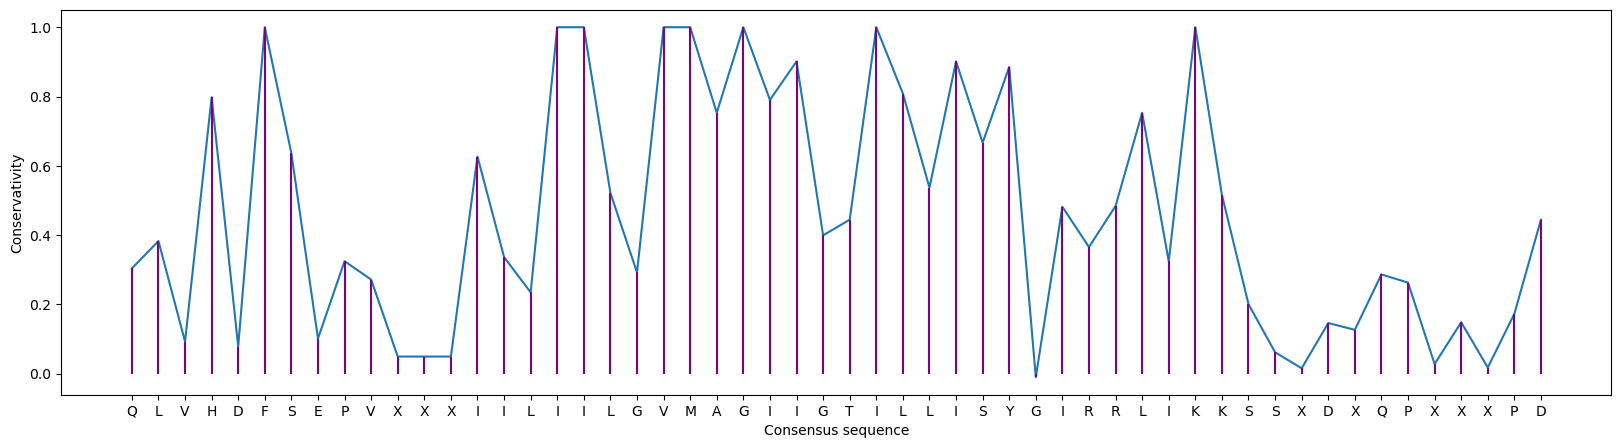

In [34]:
#visualise the conservativity 

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 5))
plt.plot(cv)
for xc in range(len(cv)):
    plt.vlines(x = xc, ymin = 0, ymax = cv[xc], colors = 'purple')
plt.xticks(range(len(cv)), list(Consensus(alignment2)))
plt.xlabel("Consensus sequence")
plt.ylabel("Conservativity")
plt.show()

<h4> MSA with a nice visualisation

In [35]:
def AlignComparison(align, similarityMatrix, thresholds):
    
    similarity = ''
    conservation = Conservation(align, similarityMatrix)
    t_1, t_2, t_3 = thresholds
    
    for S in conservation:
        if S >= t_1:
            char = '*'
        elif S >= t_2:
            char = ':'
        elif S >= t_3:
            char = '.'
        else:
            char = ' '
        similarity += char
        
    return similarity

In [36]:
symbols = AlignComparison(alignment2, BLOSUM62, (1.0, 0.5, 0.3))

for sequence in alignment2:
    print(sequence)
    
print(symbols)

QPVHPFSRPAPVVIILIILCVMAGVIGTILLISYGIRLLIK-------------
QLVHRFTVPAPVVIILIILCVMAGIIGTILLISYTIRRLIK-------------
QLAHHFSEPE---ITLIIFGVMAGVIGTILLISYGIRRLIKKSPSDVKPLPSPD
QLVHEFSELV---IALIIFGVMAGVIGTILFISYGSRRLIKKSESDVQPLPPPD
MLEHEFSAPV---AILIILGVMAGIIGIILLISYSIGQIIKKRSVDIQPPEDED
PIQHDFPALV---MILIILGVMAGIIGTILLISYCISRMTKKSSVDIQSPEGGD
QLVHIFSEPV---IIGIIYAVMLGIIITILSIAFCIGQLTKKSSLPAQVASPED
-LAHDFSQPV---ITVIILGVMAGIIGIILLLAYVSRRLRKRP-----PADVP-
SYHQDFSHAE---ITGIIFAVMAGLLLIIFLIAYLIRRMIKKPLPVPKPQDSPD
.. : *: .    :. **: **:*::..*::::: ...:.*:           .


<h4> Exercise8: Open the file "sparc_sequences" and perform the multiple sequence alignment (using profiles) and then, save it into the file adding at the end Align Comparison line. 

In [37]:
def align_coparison_file_to_file(filename,output_filename):
    seq_list = extract_seq(filename)
    align = ProfileMultipleAlignment(seq_list, BLOSUM62)
    symbols = AlignComparison(align, BLOSUM62, (1.0, 0.5, 0.3))
    with open(output_filename, 'w') as file:  
        for sequence in align:
            file.write(sequence + '\n')
        file.write(symbols + '\n')

In [38]:
align_coparison_file_to_file("sparc_sequences","output.txt")

<h4> Distance matrices

Idea: More similar sequences -> higher score -> smaller distance

In [39]:
def Score(align1, align2, similarityMatrix = DNA_2, gap = 3):
    n = len(align1)
    S = 0
    for i in range(n):
        if align1[i] == '-' or align2[i] == '-':
            S -= gap
        else:
            S += similarityMatrix[align1[i]][align2[i]]
    return S
            

def SimMatrix(alignment, similarityMatrix = DNA_2, gap = 3):
    import numpy as np
    
    n = len(alignment)
    A = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            M = max(Score(alignment[i], alignment[i], similarityMatrix, gap), Score(alignment[j], alignment[j], similarityMatrix, gap))
            A[i,j] = M - Score(alignment[i], alignment[j], similarityMatrix, gap) #the smaler value the more similar sequences are
    return A

#Remark: for the simplicity we assumed the same gap penalty for insertion and extension

In [46]:
organisms = ["human","mouse","rat","chicken"]

insuline = ["MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGERGFFYTPKTRREAEDLQVGQVELGGGPGAGSLQPLALEGSLQKRGIVEQCCTSICSLYQLENYCN",
         "MALWMRFLPLLALLFLWESHPTQAFVKQHLCGSHLVEALYLVCGERGFFYTPMSRREVEDPQVAQLELGGGPGAGDLQTLALEVAQQKRGIVDQCCTSICSLYQLENYCN",
         "MALWIRFLPLLALLILWEPRPAQAFVKQHLCGSHLVEALYLVCGERGFFYTPMSRREVEDPQVAQLELGGGPGAGDLQTLALEVARQKRGIVDQCCTSICSLYQLENYCN",
         "MALWIRSLPLLALLVFSGPGTSYAAANQHLCGSHLVEALYLVCGERGFFYSPKARRDVEQPLVSSPLRGEAGVLPFQQEEYEKVKRGIVEQCCHNTCSLYQLENYCN"]

align = ProfileMultipleAlignment(insuline, BLOSUM62)

for k, seq in enumerate(align):
    print(k, seq)

0 MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGERGFFYTPKTRREAEDLQVGQVELGGGP--G-AGSL--QPLALEGSLQKRGIVEQCCTSICSLYQLENYCN
1 MALWMRFLPLLALLFLWESHPTQAFVKQHLCGSHLVEALYLVCGERGFFYTPMSRREVEDPQVAQLELGGGP--G-AGDL--QTLALEVAQQKRGIVDQCCTSICSLYQLENYCN
2 MALWIRFLPLLALLILWEPRPAQAFVKQHLCGSHLVEALYLVCGERGFFYTPMSRREVEDPQVAQLELGGGP--G-AGDL--QTLALEVARQKRGIVDQCCTSICSLYQLENYCN
3 MALWIRSLPLLALLVFSGPGTSYAAANQHLCGSHLVEALYLVCGERGFFYSPKARRDVEQPLVS------SPLRGEAGVLPFQQEEYE--KVKRGIVEQCCHNTCSLYQLENYCN


In [41]:
align

['MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGERGFFYTPKTRREAEDLQVGQVELGGGP--G-AGSL--QPLALEGSLQKRGIVEQCCTSICSLYQLENYCN',
 'MALWMRFLPLLALLFLWESHPTQAFVKQHLCGSHLVEALYLVCGERGFFYTPMSRREVEDPQVAQLELGGGP--G-AGDL--QTLALEVAQQKRGIVDQCCTSICSLYQLENYCN',
 'MALWIRFLPLLALLILWEPRPAQAFVKQHLCGSHLVEALYLVCGERGFFYTPMSRREVEDPQVAQLELGGGP--G-AGDL--QTLALEVARQKRGIVDQCCTSICSLYQLENYCN',
 'MALWIRSLPLLALLVFSGPGTSYAAANQHLCGSHLVEALYLVCGERGFFYSPKARRDVEQPLVS------SPLRGEAGVLPFQQEEYE--KVKRGIVEQCCHNTCSLYQLENYCN']

In [42]:
print(SimMatrix(align, BLOSUM62)) #Similarity matrix for insuline sequences

[[  0. 114. 103. 239.]
 [114.   0.  32. 256.]
 [103.  32.   0. 236.]
 [239. 256. 236.   0.]]


<h4> Phylogenetic trees using UPGMA method

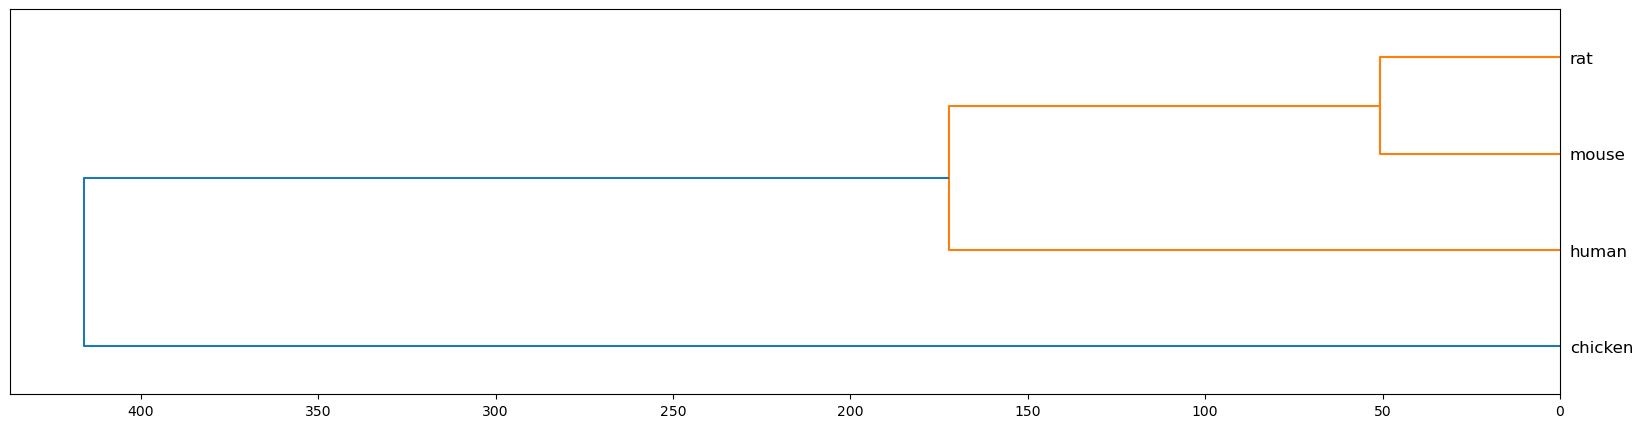

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage #to generate a tree
from scipy.spatial.distance import pdist  #to prepare an approprite format

X = pdist(SimMatrix(align, BLOSUM62)) 
dist = linkage(X, method="average")  #average = UPGMA method


fig = plt.figure(figsize=(20, 5))
dn = dendrogram(dist, labels = organisms, orientation = "left")
plt.show()

<h3> Free-alignment methods and phylogeny

<h4> Exercise9: Define a function $MerMatrix$ that takes a list of sequences and returns a matrix of distances between them (see Lecture 2, $k\_comparison$ function). Use this matrix to generate a phylogenetic tree for insuline sequences.

In [44]:
def MerMatrix(seqs):
    n = len(seqs)
    dist_matrix = [[0] * n for i in range(n)]
    
    for i in range(n):
        for j in range(i+1, n):
            dist = k_comparison(seqs[i], seqs[j])
            dist_matrix[i][j] = dist
            dist_matrix[j][i] = dist
    
    return dist_matrix

    

In [47]:
MerMatrix(sequences)

[[0, 5.66, 5.57, 6.32],
 [5.66, 0, 6.56, 7.07],
 [5.57, 6.56, 0, 5.2],
 [6.32, 7.07, 5.2, 0]]

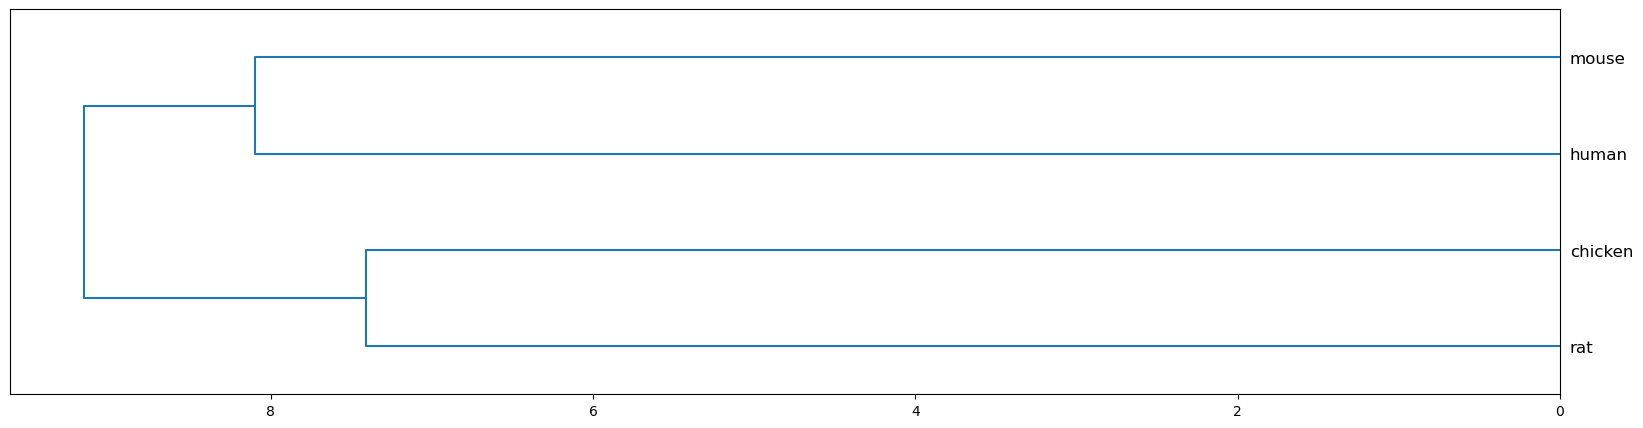

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage #to generate a tree
from scipy.spatial.distance import pdist  #to prepare an approprite format

X = pdist(MerMatrix(sequences)) 
dist = linkage(X, method="average")  #average = UPGMA method


fig = plt.figure(figsize=(20, 5))
dn = dendrogram(dist, labels = organisms, orientation = "left")
plt.show()

<h4> Exercise10: Define a function $LZMatrix$ that takes a list of sequences and returns a matrix of distances between them (see Lecture 2, $words\_comparison$ function). Use this matrix to generate a phylogenetic tree for insuline sequences.

In [54]:
def WordSeq(seq):
    d=[]
    l=len(seq)
    i=0
    k=1
    n=0
    while i<l:
        while seq[i:i+k] in d and i+k<l:#Everytime the word is already in the list, k+=1 -> the function check with the next letter
            k+=1
        if seq[i:i+k] not in d:     
            d.append(seq[i:i+k])  #When the word isn't in d, the loop stops and the word is put into the list
        i+=k  #i becomes i+k to start to read again after the words that was already added
        k=1#we set again the value of k to 1 so that when the loops start again it start to check if the next letter is in the list    
    return d
def words_comparison(seq1, seq2):
    l1 = len(WordSeq(seq1))
    l2 = len(WordSeq(seq2))
    l3 = len(WordSeq(seq1+seq2))
    C = (l3 - min(l1,l2))/max(l1,l2)
    return C

In [55]:
def LZMatrix(seqs):
    n = len(seqs)
    dist_matrix = [[0] * n for i in range(n)]
    
    for i in range(n):
        for j in range(i+1, n):
            dist = words_comparison(seqs[i], seqs[j])
            dist_matrix[i][j] = dist
            dist_matrix[j][i] = dist
    
    return dist_matrix

    

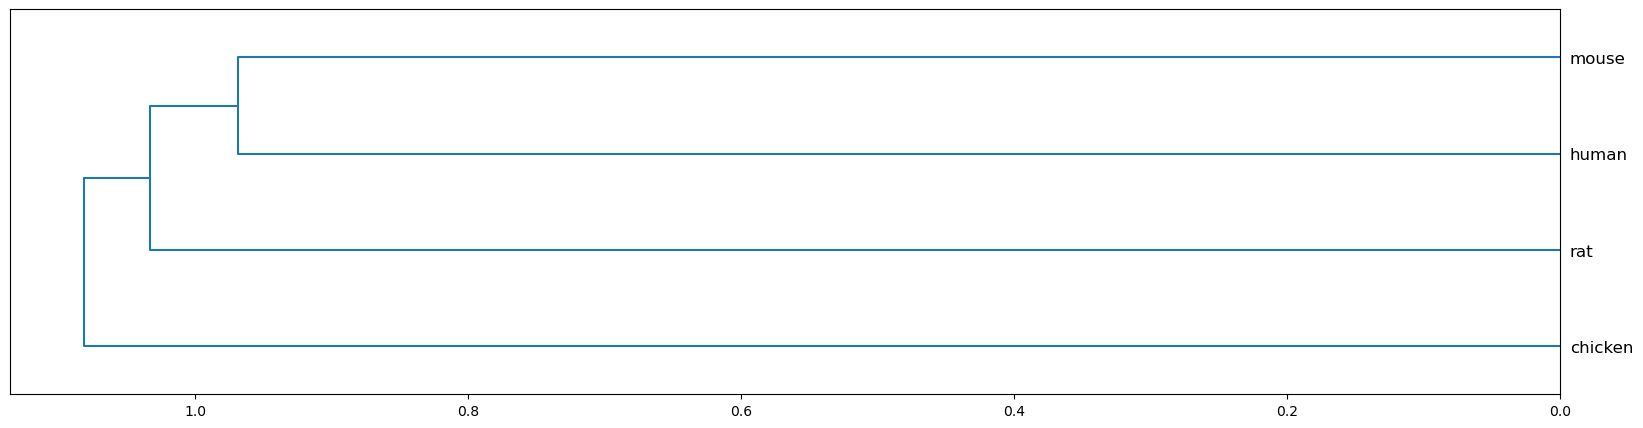

In [56]:
X = pdist(LZMatrix(sequences)) 
dist = linkage(X, method="average")  #average = UPGMA method


fig = plt.figure(figsize=(20, 5))
dn = dendrogram(dist, labels = organisms, orientation = "left")
plt.show()